In [452]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# display all columns
pd.set_option("display.max_columns",None)



In [453]:
#import dataset to DataFrame
loan=pd.read_csv("loan.csv")
#check shape and columns details of the dataframe
print(loan.shape)
loan.info(max_cols=120)



(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   hom

C:\Users\lopam\AppData\Local\Temp\ipykernel_14356\3222583062.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan=pd.read_csv("loan.csv")


###      Data Cleaning

In [454]:
#we can see from above result that several columns are totally empty, which will not help with analysis
#Identify the Null coulmns

loan.isna().sum()/len(loan)==1

loan.columns[loan.isna().sum()/len(loan)==1]
nullcols=loan.columns[loan.isna().sum()/len(loan)==1]
nullcols
#drop the Null columns
loan.drop(nullcols, axis=1,inplace=True)

In [455]:
#check the shape of dataframe
print(loan.shape)
#again check the columns with Null percentage
(loan.isna().sum()/len(loan)).sort_values(ascending=False)
#the top 5 columns with highest missing value
(loan.isna().sum()/len(loan)).sort_values(ascending=False).head(5)

(39717, 57)


next_pymnt_d              0.971297
mths_since_last_record    0.929854
mths_since_last_delinq    0.646625
desc                      0.325855
emp_title                 0.061913
dtype: float64

In [456]:
#Analyse these columns and see if they are neccessary for analysis
loan[loan.next_pymnt_d.isna()].loan_status.value_counts()
#The null values are against paid and deafulted loan, hence the data is correct however this col has no affect on loan status
#hence dropping off
#Col mths_since_last_record has huge number genuine missing values (>90 %) hence dropping off this also. Same applicable for
#mths_since_last_delinq
loan[~loan.mths_since_last_record.isna()].loan_status.value_counts()
loan=loan.drop(["next_pymnt_d","mths_since_last_record","mths_since_last_delinq"],axis=1, errors="ignore")
#keeping the remaining missing values as we do not have exact replacement to avoid exaggeration
loan.shape

(39717, 54)

In [457]:
#check the data dictionary for remaining columns and drop the ones are not necessary for analysis
print(loan.columns)
#'emp_title', 'url', 'desc', 'title', 'zip_code', 'earliest_cr_line', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
#'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
#'last_pymnt_d', 'last_pymnt_amnt', 'chargeoff_within_12_mths', 'total_acc', 'total_rec_int', 'last_credit_pull_d'
# these columns are dropped as they will not help in the analysis. 
print()
loan.drop(['emp_title', 'url', 'desc', 'title', 'zip_code', 'earliest_cr_line', 'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv','total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'chargeoff_within_12_mths', 'total_acc','total_rec_int','last_credit_pull_d'],axis=1,errors="ignore",inplace=True)
print(loan.columns)
loan.shape

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

Index(['id', 'member_id', 'loan_amnt', 'funded_amn

(39717, 34)

In [458]:
#for current analysis, the ongoing loan records are not needed, hence removing them
loan.loan_status.value_counts()
loan=loan[-(loan["loan_status"]=="Current")]
loan.shape

(38577, 34)

In [459]:
#check the remaining datafram, their data types and whether they have any incorrect data. Correct wherever needed.
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_length                  37544 non-null  object 
 11  home_ownership              38577 non-null  object 
 12  annual_inc                  38577 non-null  float64
 13  verification_status         38577 no

In [460]:
#check for all numerical columns together
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,collections_12_mths_ex_med,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38521.0,38577.0,38577.0,38577.0,37880.000000,38538.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,0.0,1.0,0.0,0.0,0.043479,0.0
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,0.0,0.0,0.0,0.0,0.204583,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,0.0,1.0,0.0,0.0,0.000000,0.0
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,0.0,1.0,0.0,0.0,0.000000,0.0
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,0.0,1.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,0.0,1.0,0.0,0.0,2.000000,0.0


In [461]:
#we can see there are some numerical columns which single level of value, hence, dropping them
loan.drop(["collections_12_mths_ex_med","policy_code","acc_now_delinq","delinq_amnt","tax_liens"],inplace=True, axis=1)
#for other numerical cols, we will perform binning during uni or multi variate analysis
loan.shape

(38577, 29)

In [462]:
loan.term.value_counts()
# categorical variable with two levels only
#remove percentage sign from int_rate
def remove_perc(x):
    return float(x[:-1])
loan["int_rate"]=loan["int_rate"].apply(lambda x: remove_perc(x))


In [463]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,f,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0,5,3,0,1687,9.40%,f,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0,2,2,0,2956,98.50%,f,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,0,1,10,0,5598,21%,f,INDIVIDUAL,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,AZ,11.20,0,3,9,0,7963,28.30%,f,INDIVIDUAL,0.0


In [464]:
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,application_type,pub_rec_bankruptcies
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,home_improvement,CO,11.33,0,0,13,0,7274,13.10%,f,INDIVIDUAL,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,credit_card,NC,6.40,1,1,6,0,8847,26.90%,f,INDIVIDUAL,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,debt_consolidation,MA,2.30,0,0,11,0,9698,19.40%,f,INDIVIDUAL,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,other,MD,3.72,0,0,17,0,85607,0.70%,f,INDIVIDUAL,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75,255.43,E,E2,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,n,debt_consolidation,MA,14.29,1,0,7,0,4175,51.50%,f,INDIVIDUAL,NaN


In [465]:
#change the format of issue date
loan.issue_d=pd.to_datetime(loan.issue_d,format="%b-%y")
loan.issue_d

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [466]:
loan.loan_status.value_counts()
loan.loan_status.isna().sum()
#this is target variable, no missing value with only two category level

0

In [467]:
#remove percentage from revol_util
loan["revol_util"][loan["revol_util"].notna()]=loan["revol_util"][loan["revol_util"].notna()].apply(lambda x: remove_perc(x))
loan["revol_util"]

C:\Users\lopam\AppData\Local\Temp\ipykernel_14356\2110572967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan["revol_util"][loan["revol_util"].notna()]=loan["revol_util"][loan["revol_util"].notna()].apply(lambda x: remove_perc(x))


0        83.7
1         9.4
2        98.5
3        21.0
5        28.3
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 38577, dtype: object

In [468]:
loan.pymnt_plan.value_counts()
#only one level, no impact on analysis, dropping off
loan.drop("pymnt_plan", inplace=True, axis=1)

In [469]:
loan.initial_list_status.value_counts()
#only one level, no impact on analysis, dropping off
loan.drop("initial_list_status", inplace=True, axis=1)

In [470]:
loan.application_type.value_counts()
#only one level, removing from analysis
loan.drop("application_type",inplace=True,axis=1)

In [471]:
#check shape of remaining DF
loan.shape

(38577, 26)

In [472]:
#check row-wise missing number
loan.isna().sum(axis=1).sort_values()
#highest values is three, less than the no of cols

0        0
26326    0
26327    0
26328    0
26329    0
        ..
25612    1
39716    1
4714     2
11282    2
24984    2
Length: 38577, dtype: int64

### Univariate analysis/Segmented - Univariate analysis

In [473]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.7,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,5,3,0,1687,9.4,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.5,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1,10,0,5598,21.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,3,9,0,7963,28.3,0.0


In [474]:
df=loan[["loan_amnt","funded_amnt","funded_amnt_inv"]]
df.corr()
#all three loan amounts are highly correlated, hence any column will give similar impact on loan_status as other two


,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.981790,0.937922
funded_amnt,0.981790,1.000000,0.956172
funded_amnt_inv,0.937922,0.956172,1.000000


<Axes: xlabel='funded_amnt', ylabel='Count'>

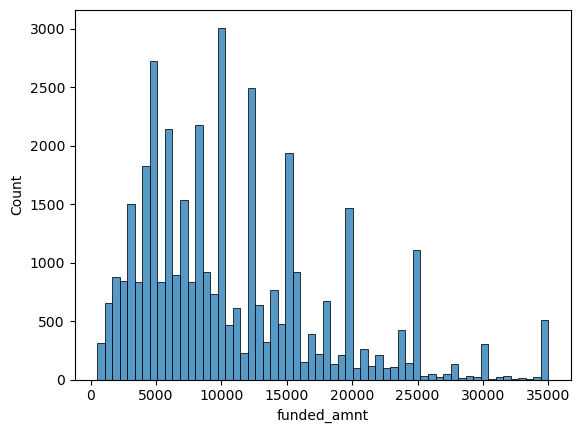

In [475]:
sns.histplot(loan.funded_amnt)
#we can see the peak in every 5000 USD, may be a indicator of different level of taxes or processing fees.

<Axes: xlabel='loan_status', ylabel='funded_amnt'>

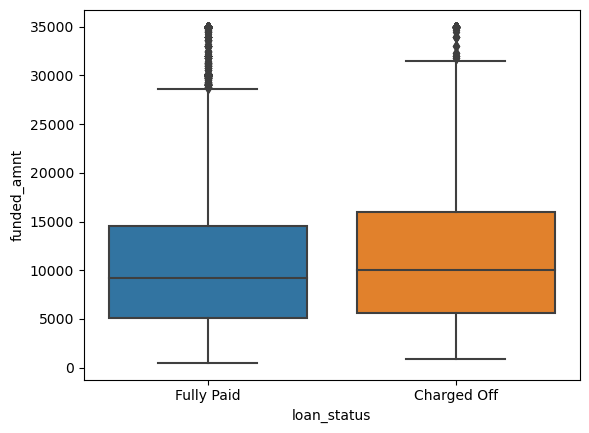

In [476]:

sns.boxplot(data=loan, y="funded_amnt", x="loan_status")
#in overall, 50th percentile loan amount is slightly higher in default cases, the difference is very minimal to gain confidence


loan_status  Charged Off  Fully Paid
amnt_bucket                         
VL(<5k)         0.139299    0.860701
L(5-7.5k)       0.118425    0.881575
M(7.5-11k)      0.136805    0.863195
H(11k-25k)      0.160593    0.839407
VH(25k+)        0.214511    0.785489
[  500.  5000.  7500. 10875. 25000.]


Text(0, 0.5, 'default rate')

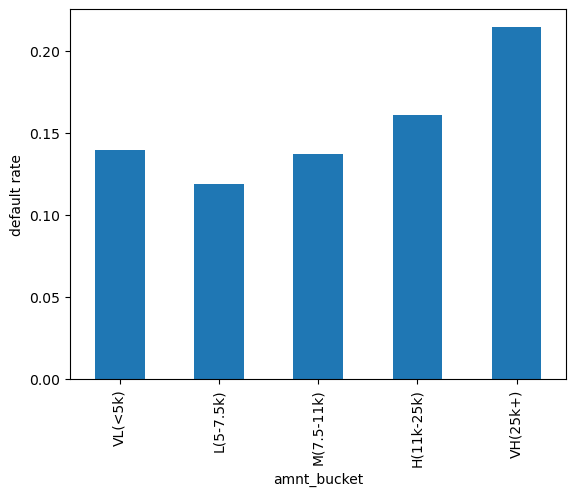

In [477]:
loan["amnt_bucket"]=pd.qcut(loan.funded_amnt,[0,0.2,0.4,0.6,0.95,1],["VL(<5k)","L(5-7.5k)","M(7.5-11k)","H(11k-25k)","VH(25k+)"])
a=pd.pivot_table(data=loan, values="id", columns="loan_status", index="amnt_bucket", aggfunc=len)
b=a.apply(lambda x: x/x.sum(), axis=1)
print(b)
print(np.quantile(loan.funded_amnt,[0,0.2,0.4,0.6,0.95]))
b.loc[:,["Charged Off"]].plot.bar(legend=False)
plt.ylabel("default rate")
#for very high funded amount (>25K), the default rate is pretty higher

In [478]:
#lets check the correlation between funded_amnt, int_rate, installment
loan[["funded_amnt", "int_rate", "installment"]].corr()

,funded_amnt,int_rate,installment
funded_amnt,1.000000,0.304930,0.958035
int_rate,0.304930,1.000000,0.277203
installment,0.958035,0.277203,1.000000


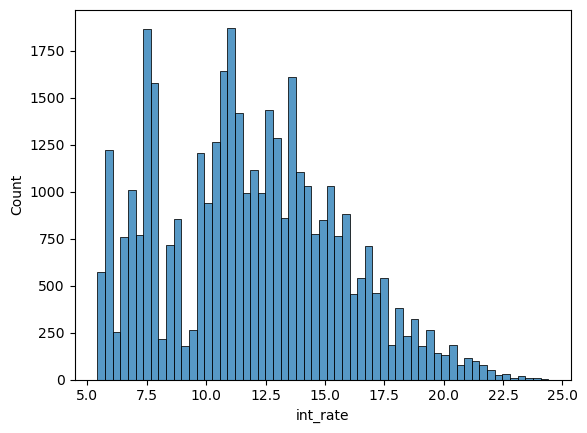

In [479]:
#installment is highly correlated with funded_amount, hence both have same impact on defaulting
sns.histplot(loan.int_rate)
plt.show()

loan_status  Charged Off  Fully Paid
int_bucket                          
L(0-16)         0.122554    0.877446
M(6-20)         0.272962    0.727038
H(20-25)        0.384416    0.615584


loan_status
Fully Paid     0.854136
Charged Off    0.145864
Name: count, dtype: float64

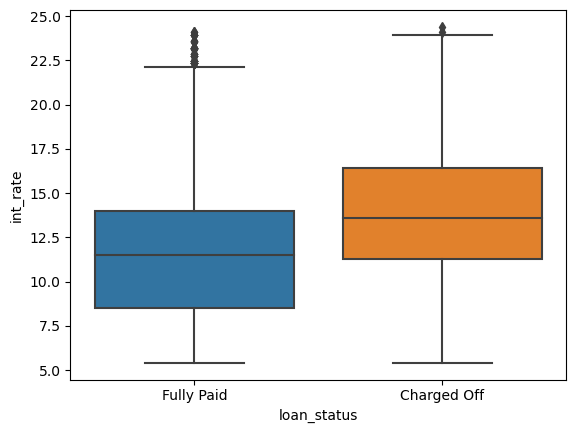

In [480]:
sns.boxplot(data=loan, y="int_rate", x="loan_status")

loan["int_bucket"]=pd.cut(loan.int_rate,[0.0,16.0,20.0,25.0],labels=["L(0-16)","M(6-20)","H(20-25)"], include_lowest=True)
b=pd.pivot_table(data=loan, values="id", columns="loan_status", index="int_bucket", aggfunc=len)
print(b.apply(lambda x: x/x.sum(), axis=1))
#calculate the percentage of default loan
loan["loan_status"].value_counts()/loan["loan_status"].value_counts().sum()

#Borrowers accepting high interest of loan, tend to default more

In [481]:
loan.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<Axes: xlabel='annual_inc', ylabel='Count'>

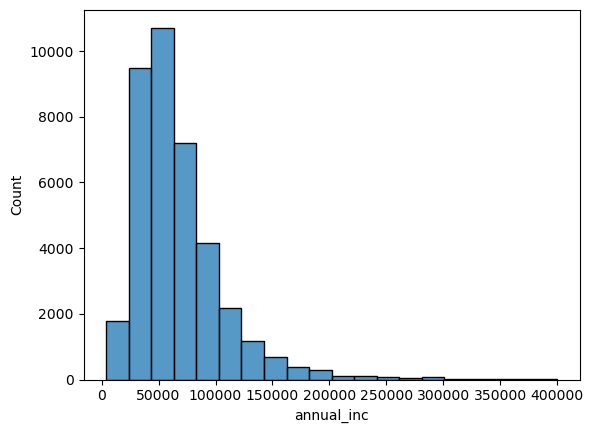

In [482]:
#as shown in the above summary statistics most of the applicants have annual income less than 400K USD
sns.histplot(loan.annual_inc[loan.annual_inc<400000],bins=20)


<Axes: xlabel='annual_inc', ylabel='Count'>

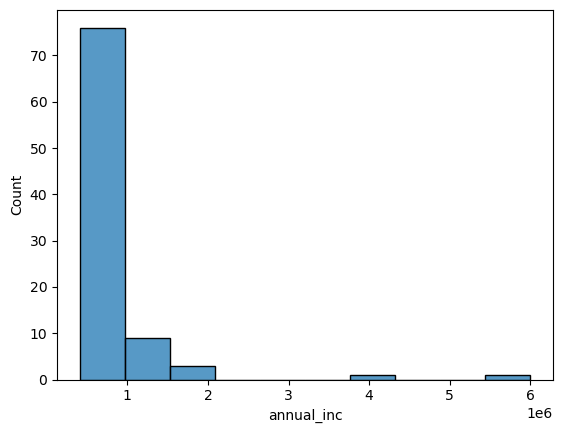

In [483]:
sns.histplot(loan.annual_inc[loan.annual_inc>400000],bins=10)
#many extreme high values present

loan_status    Charged Off  Fully Paid
income_bucket                         
L(0-60k)          0.166023    0.833977
M(60-200k)        0.122433    0.877567
H(200-6000k)      0.105263    0.894737


Text(0, 0.5, 'annual_inc(median)')

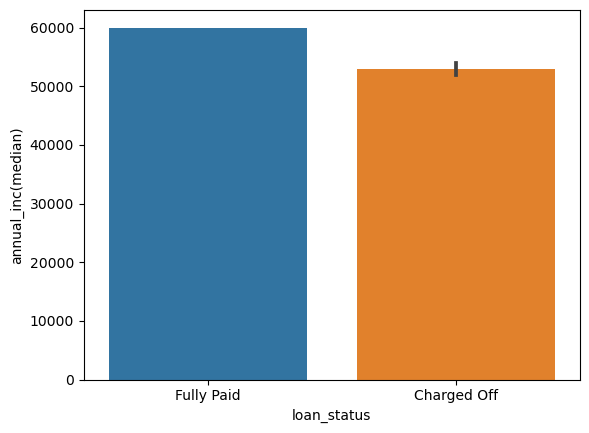

In [484]:
loan["income_bucket"]=pd.cut(loan.annual_inc,[0.0,60000.0,200000.0,6000000.0],labels=["L(0-60k)","M(60-200k)","H(200-6000k)"], include_lowest=True)
c=pd.pivot_table(data=loan, values="id", columns="loan_status", index="income_bucket", aggfunc=len)
print(c.apply(lambda x: x/x.sum(), axis=1))
sns.barplot(data=loan, y="annual_inc", x="loan_status",estimator=np.median)
plt.ylabel('annual_inc(median)')
#applicants with less annual income, tend to default more

C:\Users\lopam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


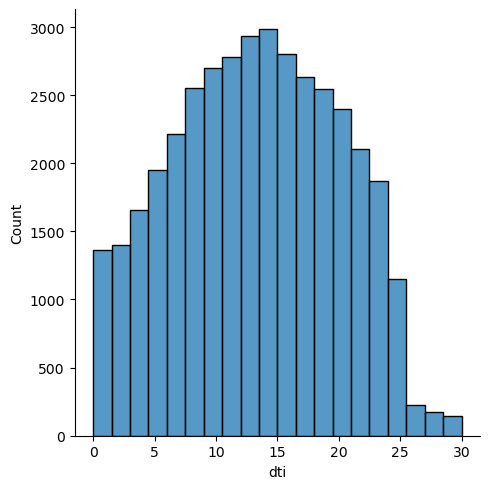

loan_status  Charged Off  Fully Paid
dti_bucket                          
L(0-8)          0.122536    0.877464
M(8-15)         0.142944    0.857056
H(15-20)        0.157644    0.842356
VH(20-32)       0.167338    0.832662


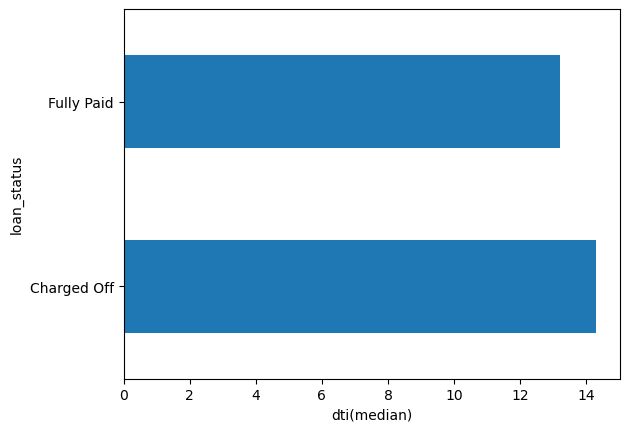

In [485]:
sns.displot(loan.dti,bins=20)
plt.show()
loan.groupby(by="loan_status")["dti"].median().plot.barh()
plt.xlabel("dti(median)")
loan["dti_bucket"]=pd.cut(loan.dti,[0.0,8.0,15.0,20.0,32.0],labels=["L(0-8)","M(8-15)","H(15-20)","VH(20-32)"], include_lowest=True)
c=pd.pivot_table(data=loan, values="id", columns="loan_status", index="dti_bucket", aggfunc=len)
print(c.apply(lambda x: x/x.sum(), axis=1))
#applicants with more monthly debt to income (dti) ratio, tend to defalt more.

<Axes: xlabel='revol_bal', ylabel='Count'>

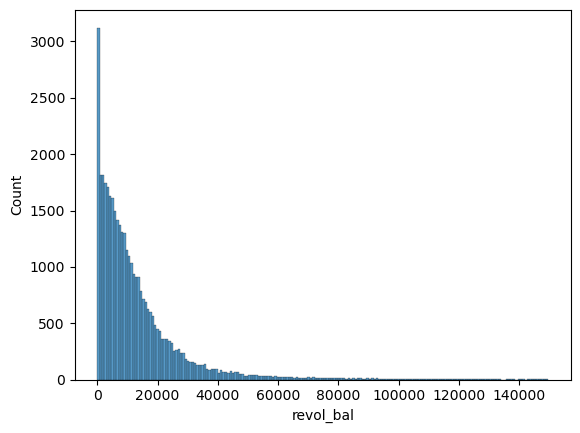

In [486]:
sns.histplot(loan.revol_bal)

<Axes: xlabel='revol_bal', ylabel='Count'>

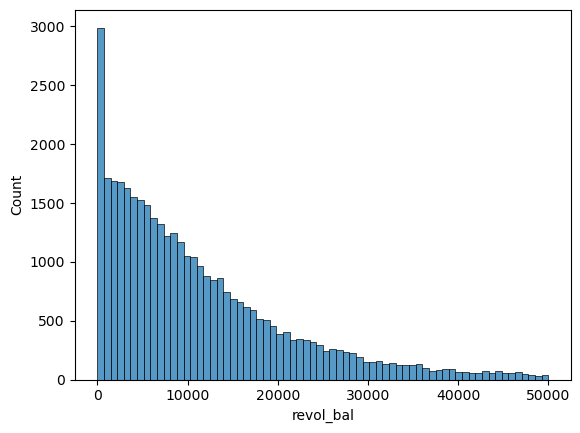

In [487]:
sns.histplot(loan.revol_bal[loan.revol_bal<50000])

<Axes: xlabel='loan_status', ylabel='revol_bal'>

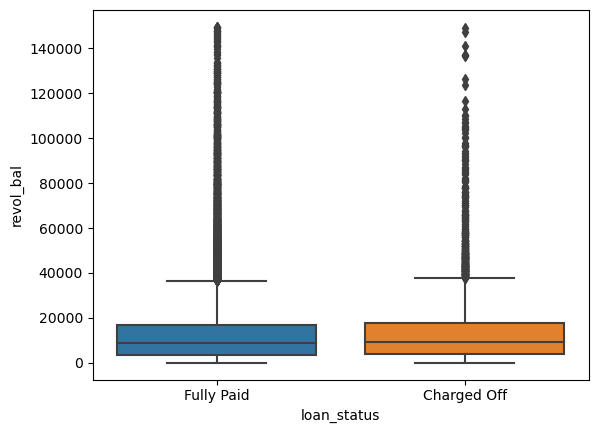

In [488]:

sns.boxplot(data=loan, y="revol_bal", x="loan_status")



In [489]:

loan["revbal_bucket"]=pd.cut(loan.revol_bal,[0.0,1000,50000.0,200001.0],labels=["L(0-1k)","M(1k-50k)","H(50k-200k)"], include_lowest=True)
d=pd.pivot_table(data=loan, values="id", columns="loan_status", index="revbal_bucket", aggfunc=len)
print(d.apply(lambda x: x/x.sum(), axis=1))

loan[loan.revol_bal>120000].head(20)
#Default rate is reduced when revolving balance is high, upon further checking it has been observed that such applicant 
#mostly fall into high to medium income which is an indicator of less default rate.

loan_status    Charged Off  Fully Paid
revbal_bucket                         
L(0-1k)           0.145753    0.854247
M(1k-50k)         0.146715    0.853285
H(50k-200k)       0.124233    0.875767


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,pub_rec_bankruptcies,amnt_bucket,int_bucket,income_bucket,dti_bucket,revbal_bucket
1366,1023228,1252052,20000,20000,20000.00000,36 months,9.91,644.50,B,B1,10+ years,MORTGAGE,210000.0,Verified,2011-12-01,Fully Paid,debt_consolidation,NY,17.86,0,3,7,0,130920,90.3,0.0,H(11k-25k),L(0-16),H(200-6000k),H(15-20),H(50k-200k)
1473,1050226,1281449,31000,31000,31000.00000,36 months,19.42,1142.94,E,E3,2 years,MORTGAGE,180000.0,Source Verified,2011-12-01,Fully Paid,credit_card,CA,13.47,0,1,9,0,131949,75.2,0.0,VH(25k+),M(6-20),M(60-200k),M(8-15),H(50k-200k)
1491,1049982,1281219,35000,35000,35000.00000,60 months,14.27,819.30,C,C2,3 years,MORTGAGE,160000.0,Verified,2011-12-01,Fully Paid,debt_consolidation,MO,22.06,0,1,17,0,124744,51.9,0.0,VH(25k+),L(0-16),M(60-200k),VH(20-32),H(50k-200k)
3377,1019471,1248171,25000,25000,24975.00000,36 months,7.90,782.26,A,A4,9 years,MORTGAGE,156000.0,Verified,2011-11-01,Fully Paid,debt_consolidation,CA,13.59,0,1,13,0,123416,26.0,0.0,H(11k-25k),L(0-16),M(60-200k),M(8-15),H(50k-200k)
3544,1016763,1244280,4000,4000,4000.00000,36 months,10.65,130.30,B,B2,10+ years,MORTGAGE,300000.0,Source Verified,2011-11-01,Fully Paid,debt_consolidation,FL,13.63,0,0,16,0,120504,92.9,0.0,VL(<5k),L(0-16),H(200-6000k),M(8-15),H(50k-200k)
3733,1009315,1236059,5750,5750,5500.00000,60 months,8.90,119.09,A,A5,7 years,MORTGAGE,72000.0,Not Verified,2011-11-01,Fully Paid,debt_consolidation,CA,21.82,0,0,10,0,140967,27.9,0.0,L(5-7.5k),L(0-16),M(60-200k),VH(20-32),H(50k-200k)
4183,1002882,1229166,24000,24000,24000.00000,60 months,18.25,612.72,D,D5,8 years,RENT,228000.0,Source Verified,2011-11-01,Fully Paid,major_purchase,WA,9.13,0,1,18,0,131006,74.6,0.0,H(11k-25k),M(6-20),H(200-6000k),M(8-15),H(50k-200k)
4746,997561,1222660,5000,5000,5000.00000,36 months,7.51,155.56,A,A3,10+ years,MORTGAGE,80796.0,Not Verified,2011-10-01,Fully Paid,car,KY,10.19,1,1,7,0,125027,2.3,0.0,VL(<5k),L(0-16),M(60-200k),M(8-15),H(50k-200k)
4867,995913,1220507,6000,6000,6000.00000,36 months,6.03,182.62,A,A1,9 years,MORTGAGE,44400.0,Verified,2011-10-01,Fully Paid,small_business,AZ,14.73,0,1,6,0,133681,69.3,0.0,L(5-7.5k),L(0-16),L(0-60k),M(8-15),H(50k-200k)
5739,866572,1080045,15300,15300,15300.00000,60 months,7.90,309.50,A,A4,10+ years,MORTGAGE,40000.0,Verified,2011-10-01,Fully Paid,house,AZ,25.23,0,0,10,0,124659,8.8,0.0,H(11k-25k),L(0-16),L(0-60k),VH(20-32),H(50k-200k)


<Axes: xlabel='revol_util', ylabel='Count'>

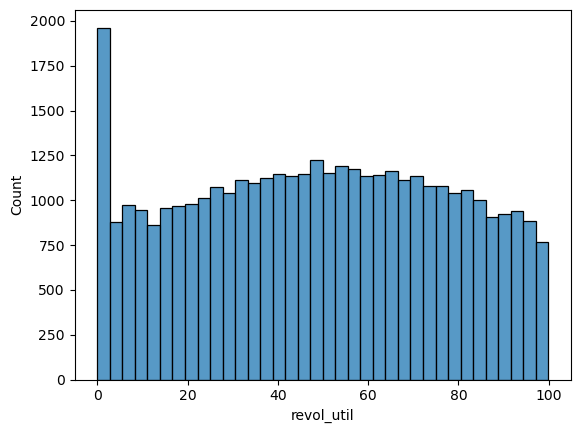

In [490]:
sns.histplot(data=loan, x="revol_util")

loan_status     Charged Off  Fully Paid
revutil_bucket                         
L(0-3%)            0.122439    0.877561
M(3-30%)           0.099319    0.900681
H(30-100%)         0.163558    0.836442


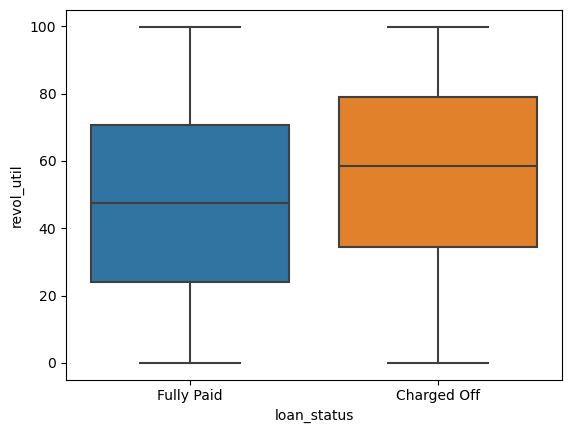

In [491]:
sns.boxplot(data=loan, y="revol_util", x="loan_status")
loan["revutil_bucket"]=pd.cut(loan.revol_util,[0.0,3.0,30.0,100],labels=["L(0-3%)","M(3-30%)","H(30-100%)"], include_lowest=True)
e=pd.pivot_table(data=loan, values="id", columns="loan_status", index="revutil_bucket", aggfunc=len)
print(e.apply(lambda x: x/x.sum(), axis=1))
#loan[loan.revol_util>=70.0].head(100)
#Default rate is higher, when revolving credit line utilization is higher.

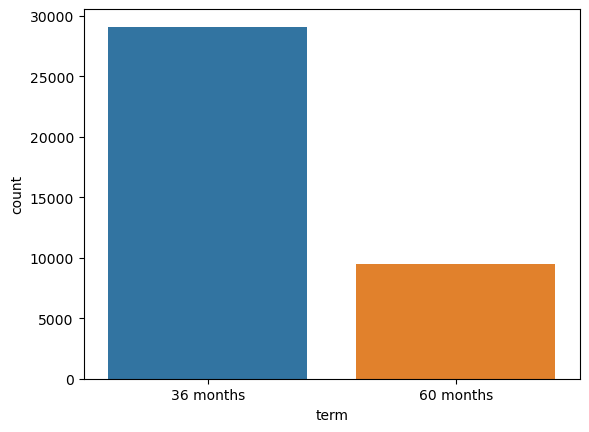

In [536]:
#defining a custom function to plot frequency of different categorical variable
def cplot(a):
    sns.countplot(data=loan, x=a)
#defining a custom function to calculate default rate/percentage across different levels of a categorical variable 
def default_pct(i):
    t=pd.pivot_table(data=loan, values="id", columns="loan_status", index=i, aggfunc=len)
    return t.apply(lambda x: x/x.sum(), axis=1)


#remove white spaces from term column
loan.term=loan.term.apply(lambda x:x.strip())
cplot("term")

loan_status  Charged Off  Fully Paid
term                                
36 months       0.110909    0.889091
60 months       0.253138    0.746862


Text(0, 0.5, 'Percentage/rate')

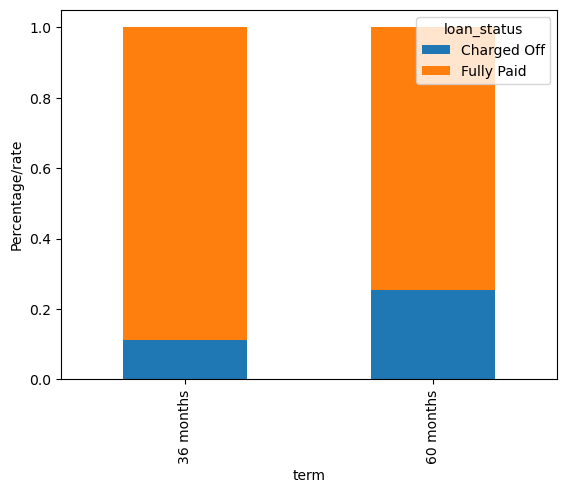

In [537]:
print(default_pct("term"))
default_pct("term").plot(kind="bar", stacked=True)
plt.ylabel("Percentage/rate")


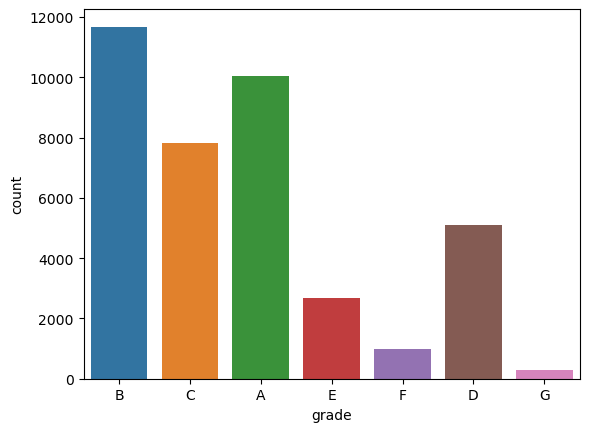

In [494]:
cplot("grade")

loan_status  Charged Off  Fully Paid
grade                               
A               0.059930    0.940070
B               0.122056    0.877944
C               0.171943    0.828057
D               0.219862    0.780138
E               0.268494    0.731506
F               0.326844    0.673156
G               0.337793    0.662207


int_bucket
H(20-25)    274
M(6-20)      25
L(0-16)       0
Name: count, dtype: int64

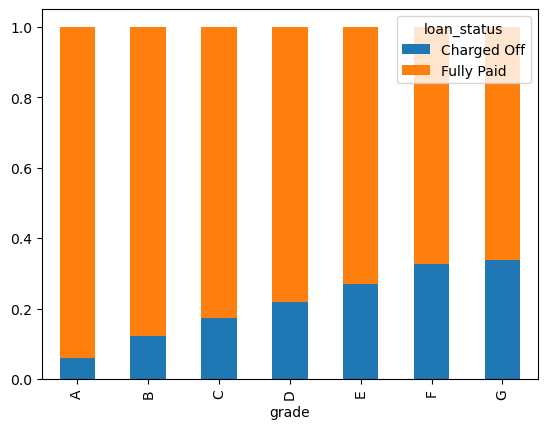

In [495]:
print(default_pct("grade"))
default_pct("grade").plot(kind="bar", stacked=True)
loan[loan.grade=="G"].int_bucket.value_counts()
#Grade G is showing highest rate defaults probably as high interest rates are associated with these loans

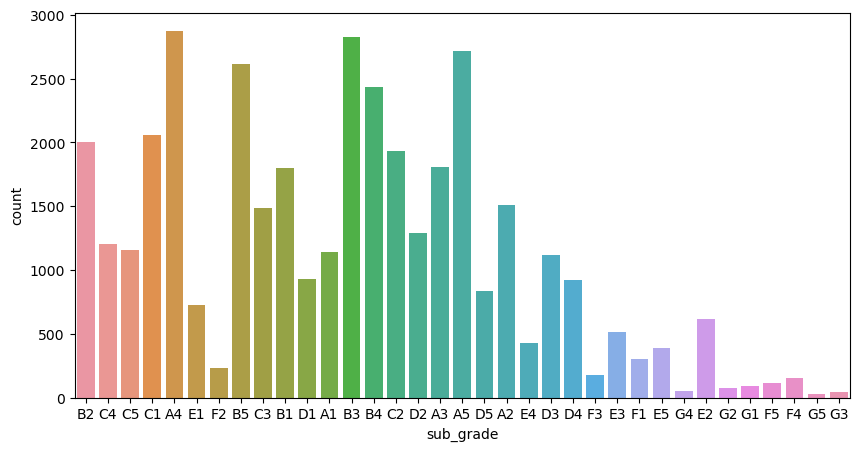

In [496]:
plt.figure(figsize=(10,5))
cplot("sub_grade")

loan_status  Charged Off  Fully Paid
sub_grade                           
A1              0.026339    0.973661
A2              0.049072    0.950928
A3              0.056906    0.943094
A4              0.061956    0.938044
A5              0.079926    0.920074
B1              0.095159    0.904841
B2              0.113943    0.886057
B3              0.120708    0.879292
B4              0.135002    0.864998
B5              0.136138    0.863862
C1              0.163504    0.836496
C2              0.166235    0.833765
C3              0.181452    0.818548
C4              0.175788    0.824212
C5              0.180243    0.819757
D1              0.179377    0.820623
D2              0.210731    0.789269
D3              0.229391    0.770609
D4              0.234205    0.765795
D5              0.250600    0.749400
E1              0.274238    0.725762
E2              0.265472    0.734528
E3              0.230620    0.769380
E4              0.297170    0.702830
E5              0.281654    0.718346
F

<Axes: xlabel='sub_grade'>

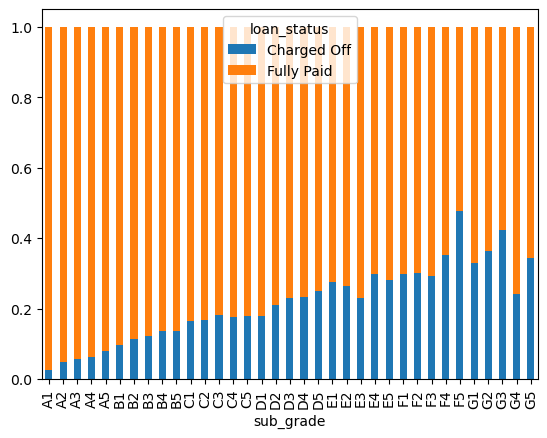

In [497]:
print(default_pct("sub_grade"))
default_pct("sub_grade").plot(kind="bar", stacked=True)
#F5 shows the highest default rate

emp_length
Junior(upto 3 yrs)     15980
senior(7+ yrs)         12860
mid-senior(4-6 yrs)     8704
self-employed           1033
Name: count, dtype: int64

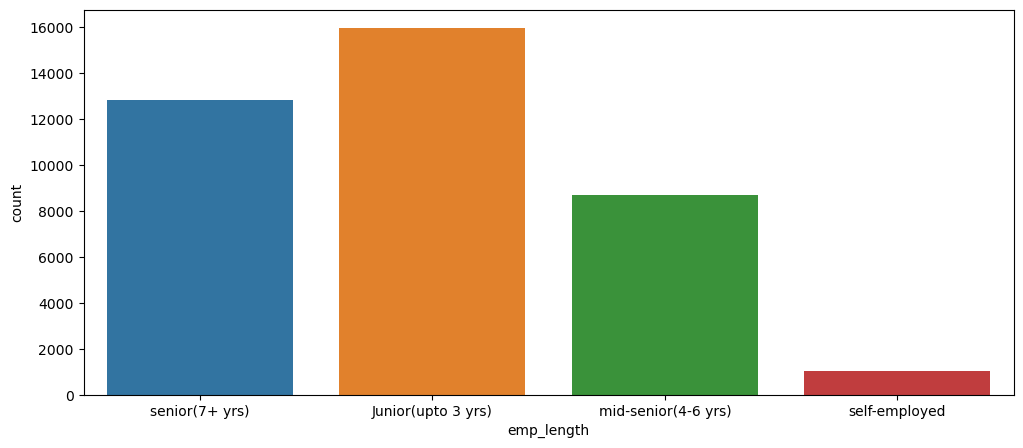

In [498]:
loan.emp_length[loan.emp_length.isna()]
#Assuming that the NA values for indicating self employed persons
loan.emp_length.fillna("self-employed",inplace=True)
#also club the levels into broader category as there is not diffrent between 1 and 2 years experienced person
def exp_cat(x):
    if x in ["< 1 year","2 years","3 years", "1 year"]:
        return "Junior(upto 3 yrs)"
    elif x in ["4 years","5 years","6 years"]:
        return "mid-senior(4-6 yrs)"
    elif x in ["7 years","8 years","9 years","10+ years"]:
        return "senior(7+ yrs)"
    else:
        return x

loan["emp_length"]=loan.emp_length.apply(exp_cat)
plt.figure(figsize=(12,5))
cplot("emp_length")
loan.emp_length.value_counts()

loan_status          Charged Off  Fully Paid
emp_length                                  
Junior(upto 3 yrs)      0.138736    0.861264
mid-senior(4-6 yrs)     0.140970    0.859030
self-employed           0.220716    0.779284
senior(7+ yrs)          0.152022    0.847978


<Axes: xlabel='emp_length'>

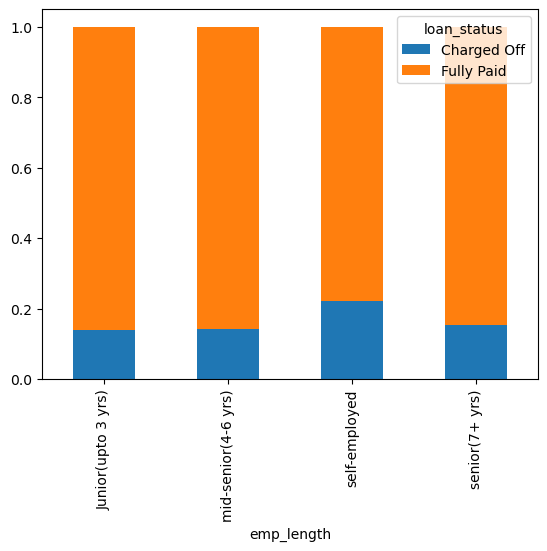

In [499]:
print(default_pct("emp_length"))
default_pct("emp_length").plot(kind="bar", stacked=True)
#Self-employed applicants tend to default more

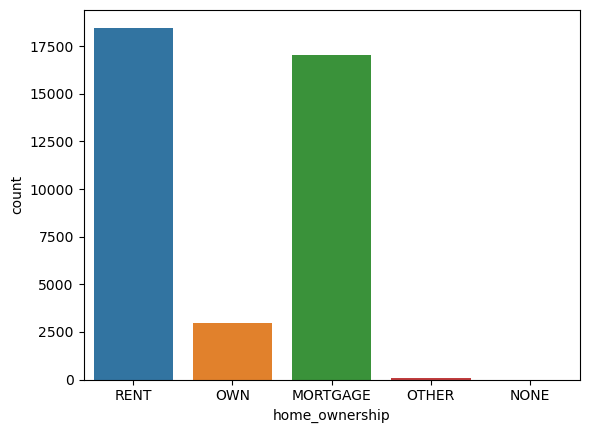

In [500]:
cplot("home_ownership")


loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE           0.136713    0.863287
NONE                    NaN    1.000000
OTHER              0.183673    0.816327
OWN                0.148908    0.851092
RENT               0.153626    0.846374


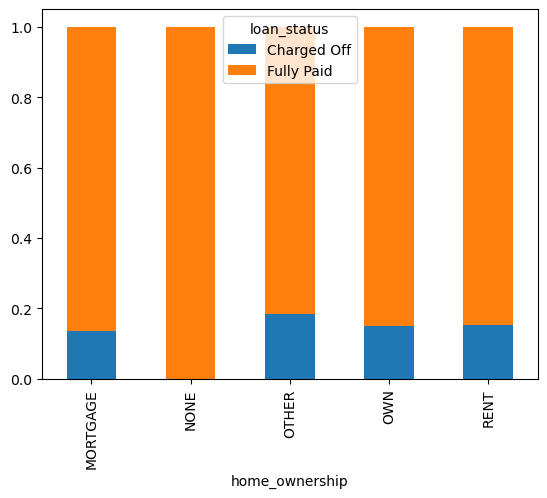

In [501]:
print(default_pct("home_ownership"))
default_pct("home_ownership").plot(kind="bar", stacked=True)
plt.show()
#Assuming that the other category comprises of people who are homeless or they stay at their friends' or parents'. Such applicants
#tend to default more

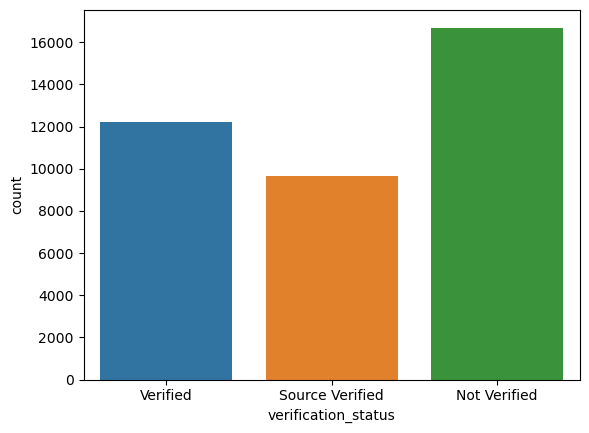

In [502]:
cplot("verification_status")


loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified            0.128310    0.871690
Source Verified         0.148186    0.851814
Verified                0.168032    0.831968


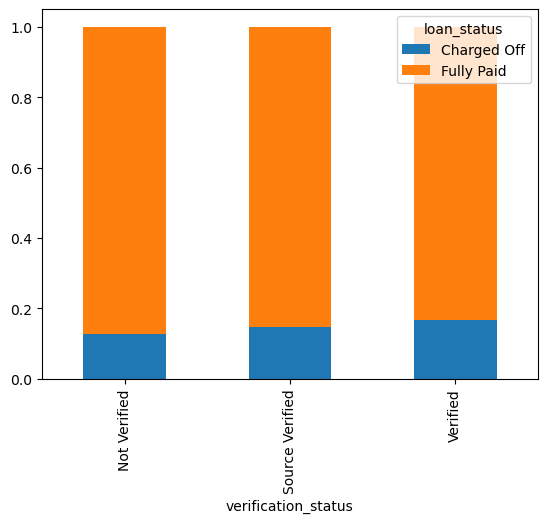

In [503]:
print(default_pct("verification_status"))
default_pct("verification_status").plot(kind="bar", stacked=True)
plt.show()
#not much difference in default rates, however verified loans have more default rate in this dataset, further data should be 
#checked

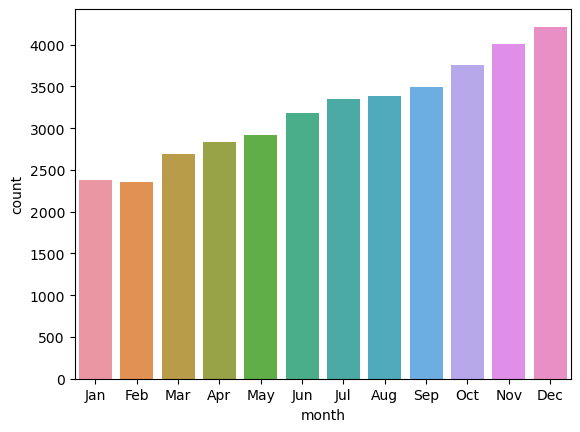

In [504]:
#create issue of month of every loan
loan["month"]=loan.issue_d.dt.month
cplot("month")
ticks=[0,1,2,3,4,5,6,7,8,9,10,11]
labels=["Jan", "Feb", "Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.xticks(ticks, labels)
plt.show()
#Nov, Dec has highest no og issued loan, clearly these are festive month and people tend to spend more during holidays

loan_status  Charged Off  Fully Paid
month                               
1               0.134931    0.865069
2               0.122986    0.877014
3               0.128948    0.871052
4               0.130696    0.869304
5               0.159644    0.840356
6               0.151887    0.848113
7               0.142942    0.857058
8               0.138135    0.861865
9               0.156375    0.843625
10              0.154214    0.845786
11              0.149276    0.850724
12              0.160854    0.839146


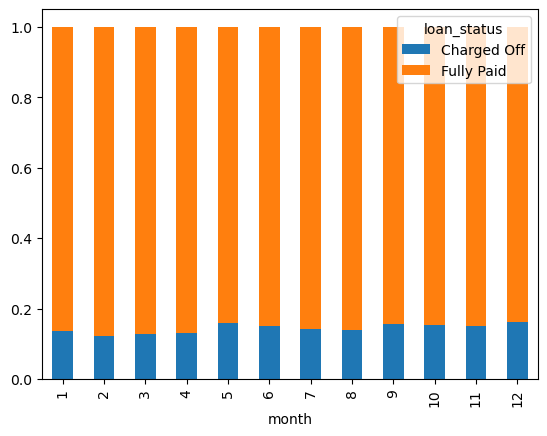

In [505]:
print(default_pct("month"))
default_pct("month").plot(kind="bar", stacked=True)
plt.show()
#not much change in default rate monthwise

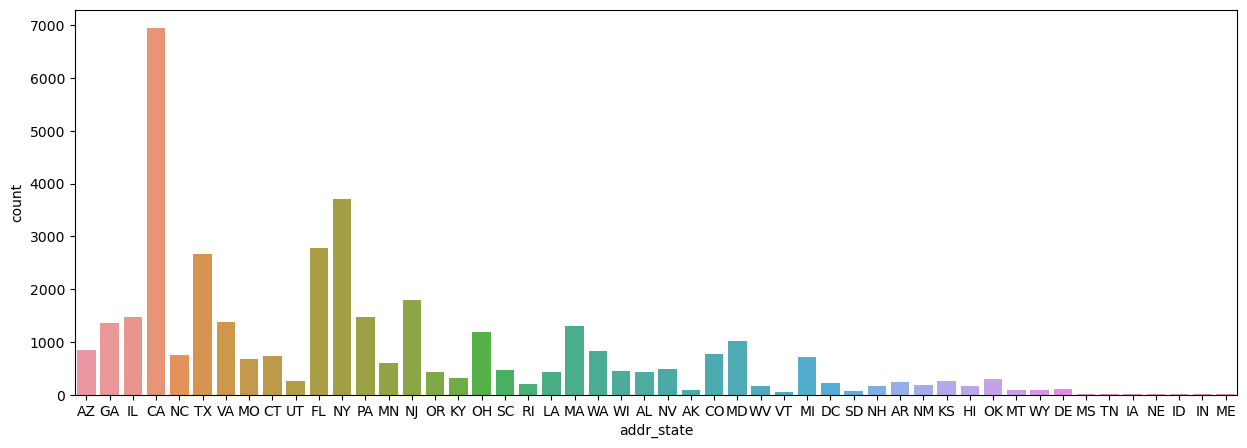

In [506]:
plt.figure(figsize=(15,5))
cplot("addr_state")
#Almost 20% aplplicants are coming from California

<Figure size 3000x500 with 0 Axes>

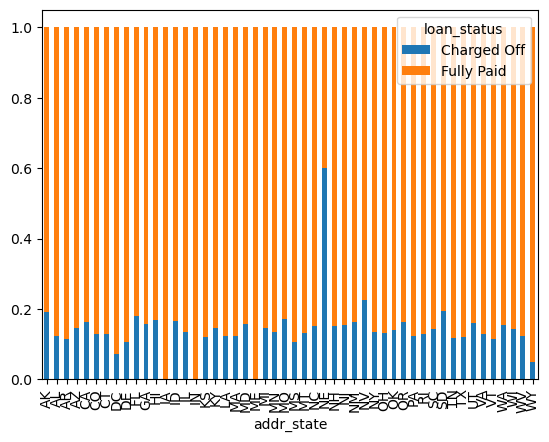

In [507]:
plt.figure(figsize=(30,5))
default_pct("addr_state").plot(kind="bar", stacked=True)
plt.show()
#print(default_pct("addr_state"))
#Nebraska is showing highest default rate, this needs to be further investigated

In [508]:
loan.delinq_2yrs.value_counts()
#based on default percentage in each segment, converting this column into binary variable
loan["delinq_2yrs"]=loan["delinq_2yrs"].apply(lambda x:"Not delinq" if x==0.0 else "delinq")
print(loan.delinq_2yrs.value_counts())


delinq_2yrs
Not delinq    34386
delinq         4191
Name: count, dtype: int64


<Figure size 3000x500 with 0 Axes>

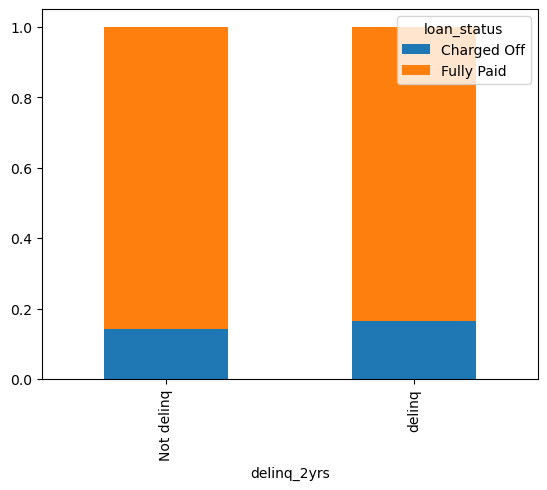

loan_status  Charged Off  Fully Paid
delinq_2yrs                         
Not delinq      0.143547    0.856453
delinq          0.164877    0.835123


In [509]:
plt.figure(figsize=(30,5))
default_pct("delinq_2yrs").plot(kind="bar", stacked=True)
plt.show()
print(default_pct("delinq_2yrs"))
#delinquncy is not showing much impact on default rate

In [510]:
#based on default percentage in each segment, converting this to a ordered column with 3 levels
def inquiry(x):
    if x<1:
        return "No inquiry"
    elif x==1:
        return "Single inquiry"
    elif x==2:
        return "double inquiry"
    else:
        return "multi inquiry"


loan["inq_last_6mths"]=loan["inq_last_6mths"].apply(inquiry)
loan.inq_last_6mths.value_counts()

inq_last_6mths
No inquiry        18709
Single inquiry    10660
double inquiry     5654
multi inquiry      3554
Name: count, dtype: int64

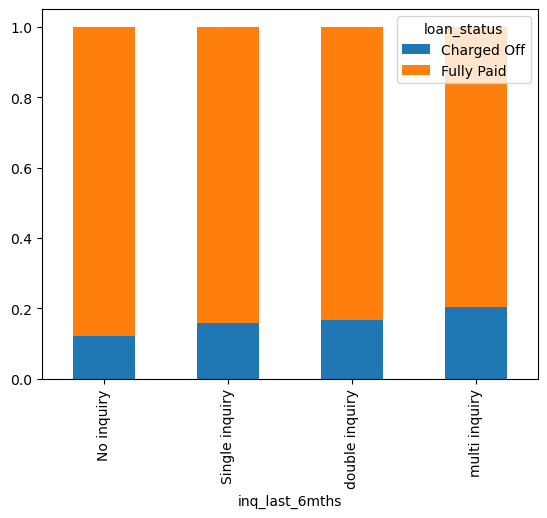

loan_status     Charged Off  Fully Paid
inq_last_6mths                         
No inquiry         0.121866    0.878134
Single inquiry     0.157317    0.842683
double inquiry     0.166785    0.833215
multi inquiry      0.204558    0.795442


In [511]:
default_pct("inq_last_6mths").plot(kind="bar", stacked=True)
plt.show()
print(default_pct("inq_last_6mths"))
#applicant who made multiple(>2) inquiries, tend to default more

In [512]:
#loan.open_acc.value_counts().apply(lambda x: x/x.sum())
f=pd.pivot_table(data=loan, values="id", columns="loan_status", index="open_acc", aggfunc=len)
print(f.apply(lambda x: x/x.sum(), axis=1))
loan.open_acc.value_counts()


loan_status  Charged Off  Fully Paid
open_acc                            
2               0.213087    0.786913
3               0.175510    0.824490
4               0.158261    0.841739
5               0.136612    0.863388
6               0.141186    0.858814
7               0.142492    0.857508
8               0.143157    0.856843
9               0.143610    0.856390
10              0.150145    0.849855
11              0.143286    0.856714
12              0.136943    0.863057
13              0.141779    0.858221
14              0.152067    0.847933
15              0.146597    0.853403
16              0.115639    0.884361
17              0.142458    0.857542
18              0.131783    0.868217
19              0.153646    0.846354
20              0.149466    0.850534
21              0.157447    0.842553
22              0.131387    0.868613
23              0.129032    0.870968
24              0.120000    0.880000
25              0.207547    0.792453
26              0.205882    0.794118
2

open_acc
7     3909
6     3846
8     3814
9     3607
5     3111
10    3097
11    2666
4     2300
12    2198
13    1855
3     1470
14    1427
15    1146
16     908
17     716
2      596
18     516
19     384
20     281
21     235
22     137
23      93
24      75
25      53
26      34
28      24
27      22
30      15
29      13
31       7
34       5
35       4
32       3
33       3
36       2
39       1
38       1
44       1
41       1
42       1
Name: count, dtype: int64

In [513]:
#the col open_acc has on everage same default percentage at every level till 22, when no of open acc is hight the default
#chances are high but such levels are having very less records to have confidence, hence dropping off the columns
loan.drop("open_acc",inplace=True,axis=1)


In [514]:
loan[["pub_rec_bankruptcies","pub_rec"]].corr()
#analysing col pub_rec only both these are highly correlated and bankruptcy records are also published in pub_rec
#dropping off "pub_rec_bankruptcies"

,pub_rec_bankruptcies,pub_rec
pub_rec_bankruptcies,1.000000,0.845938
pub_rec,0.845938,1.000000


In [515]:
loan.drop("pub_rec_bankruptcies",inplace=True,axis=1)

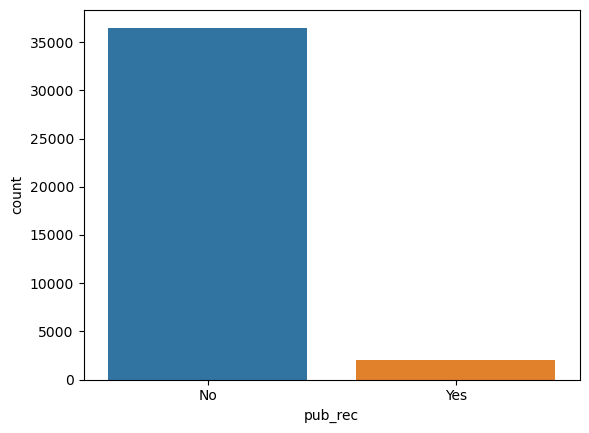

In [516]:
loan.pub_rec.value_counts()
#as level 2,3,4 has very less records, hence converting the variable into binary category
loan["pub_rec"]=loan["pub_rec"].apply(lambda x: "No" if x<1 else "Yes")
cplot("pub_rec")

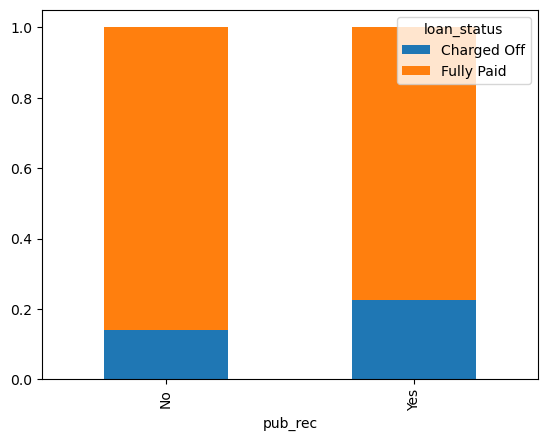

loan_status  Charged Off  Fully Paid
pub_rec                             
No              0.141343    0.858657
Yes             0.225604    0.774396


In [517]:
default_pct("pub_rec").plot(kind="bar", stacked=True)
plt.show()
print(default_pct("pub_rec"))
#borrowers with derogatory public records (like bankrupcy, foreclosure etc) tend to default more

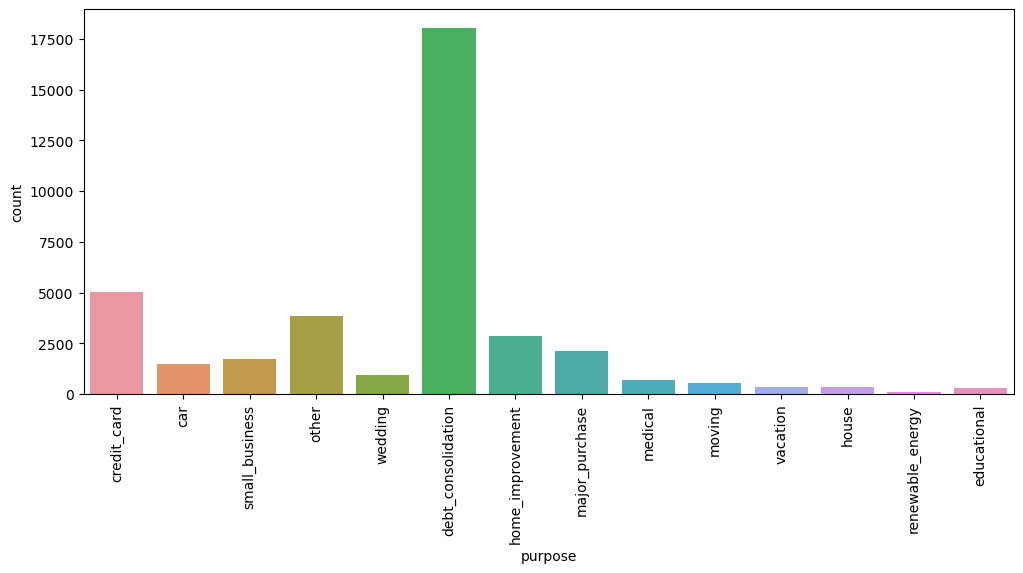

In [518]:
plt.figure(figsize=(12,5))
cplot("purpose")
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x300 with 0 Axes>

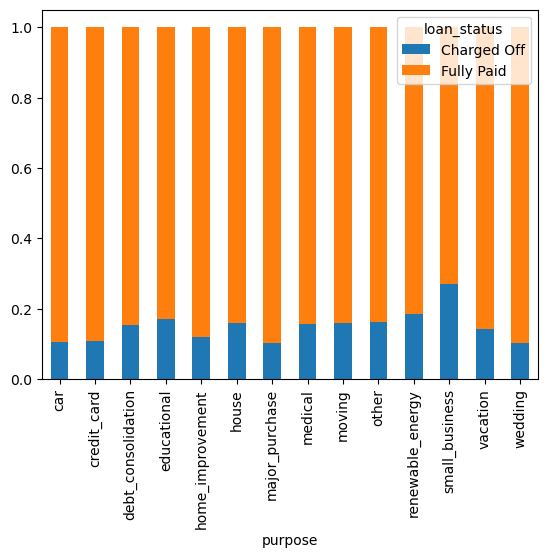

loan_status         Charged Off  Fully Paid
purpose                                    
car                    0.106738    0.893262
credit_card            0.107818    0.892182
debt_consolidation     0.153254    0.846746
educational            0.172308    0.827692
home_improvement       0.120696    0.879304
house                  0.160763    0.839237
major_purchase         0.103256    0.896744
medical                0.155653    0.844347
moving                 0.159722    0.840278
other                  0.163777    0.836223
renewable_energy       0.186275    0.813725
small_business         0.270810    0.729190
vacation               0.141333    0.858667
wedding                0.103672    0.896328


In [519]:
plt.figure(figsize=(10,3))
default_pct("purpose").plot(kind="bar", stacked=True)
plt.show()
print(default_pct("purpose"))
#applicants with small business tend to default more


## Multivariate analysis

In [520]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,amnt_bucket,int_bucket,income_bucket,dti_bucket,revbal_bucket,revutil_bucket,month
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,senior(7+ yrs),RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,Not delinq,Single inquiry,No,13648,83.7,VL(<5k),L(0-16),L(0-60k),VH(20-32),M(1k-50k),H(30-100%),12
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Junior(upto 3 yrs),RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,Not delinq,multi inquiry,No,1687,9.4,VL(<5k),L(0-16),L(0-60k),L(0-8),M(1k-50k),M(3-30%),12
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,senior(7+ yrs),RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,Not delinq,double inquiry,No,2956,98.5,VL(<5k),L(0-16),L(0-60k),M(8-15),M(1k-50k),H(30-100%),12
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,senior(7+ yrs),RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,Not delinq,Single inquiry,No,5598,21.0,M(7.5-11k),L(0-16),L(0-60k),H(15-20),M(1k-50k),M(3-30%),12
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Junior(upto 3 yrs),RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,Not delinq,multi inquiry,No,7963,28.3,VL(<5k),L(0-16),L(0-60k),M(8-15),M(1k-50k),M(3-30%),12


In [521]:
#creating below binary variable to calculate default percentage for any category
loan["default"]=loan.loan_status.apply(lambda x: 1 if x=="Charged Off" else 0)


<Axes: xlabel='None-amnt_bucket', ylabel='int_bucket'>

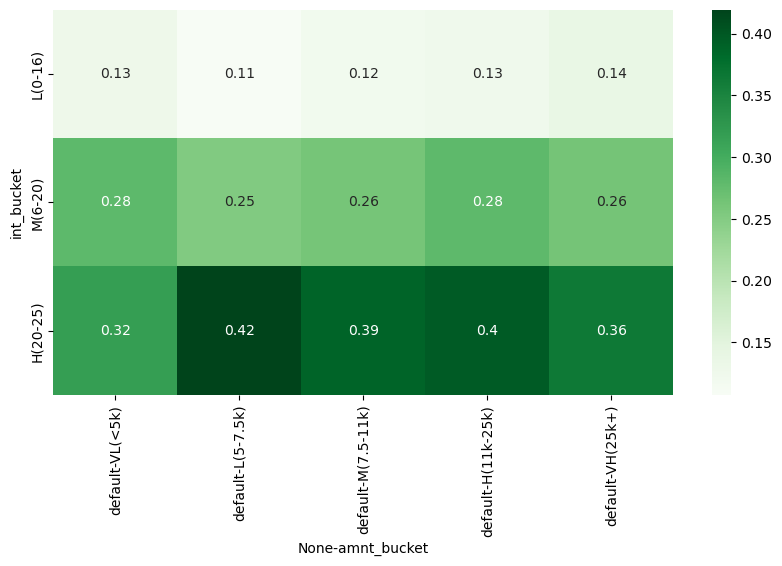

In [522]:
cat=pd.pivot_table(data=loan, values=["default"], columns=["amnt_bucket"], index=["int_bucket"], aggfunc=np.mean)
plt.figure(figsize=(10,5))
sns.heatmap(cat,cmap="Greens", annot=True)
#medium to high interest rate>6% are associated with high default rate, special attention should be given when loan amount 
#more than 5K USD

<Axes: xlabel='None-income_bucket', ylabel='emp_length'>

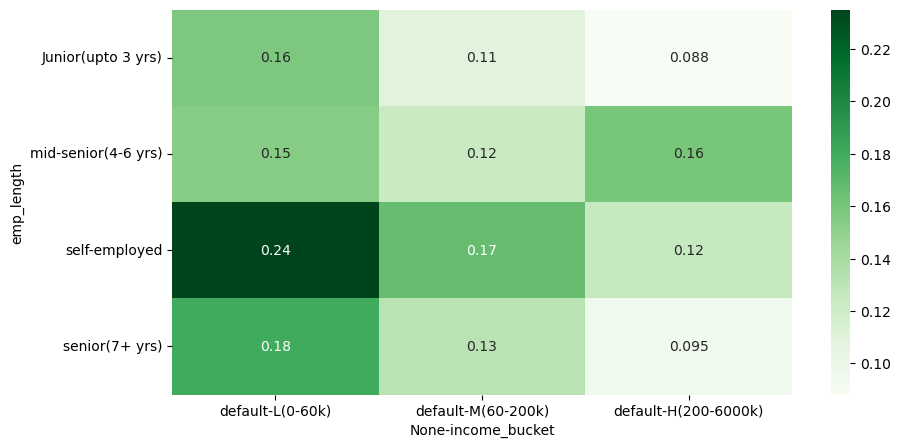

In [523]:
cat=pd.pivot_table(data=loan, values=["default"], columns=["income_bucket"], index=["emp_length"], aggfunc=np.mean)
plt.figure(figsize=(10,5))
sns.heatmap(cat,cmap="Greens", annot=True)
#self-employed candidates with low annual income (<60K), tend to default more

purpose
debt_consolidation    380
other                 152
credit_card           128
home_improvement       90
major_purchase         70
car                    51
small_business         44
vacation               27
medical                25
moving                 24
wedding                13
house                  13
renewable_energy        8
educational             8
Name: count, dtype: int64

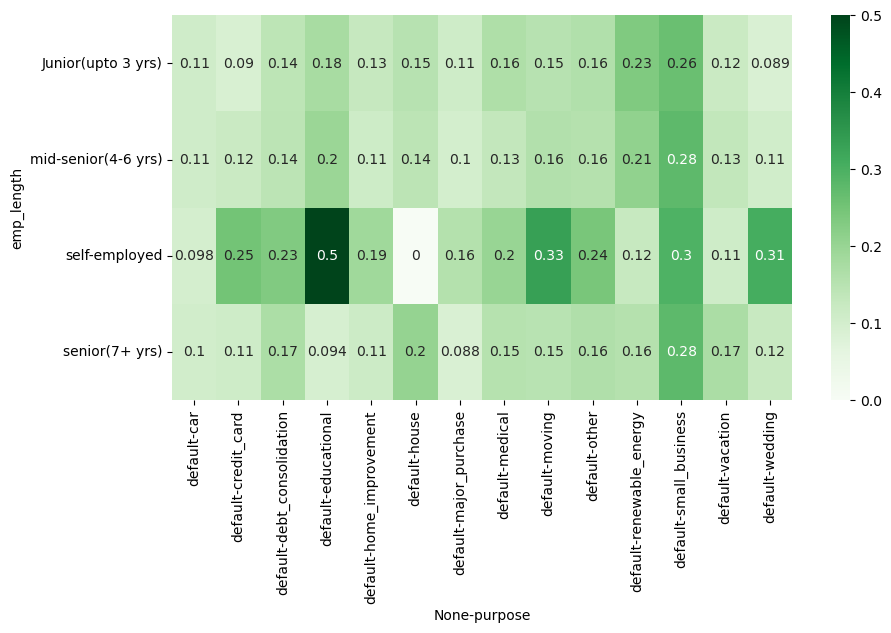

In [524]:
cat=pd.pivot_table(data=loan, values=["default"], columns=["purpose"], index=["emp_length"], aggfunc=np.mean)
plt.figure(figsize=(10,5))
sns.heatmap(cat,cmap="Greens", annot=True)
loan.purpose[loan.emp_length=="self-employed"].value_counts()
#Education is purpose only 8 times when applicant is self-employed, record no is too less to make an insight, however small
#businesses are defaulting loans than other purposes, the rate is even higher applicant is self employed

<Axes: xlabel='None-purpose', ylabel='term'>

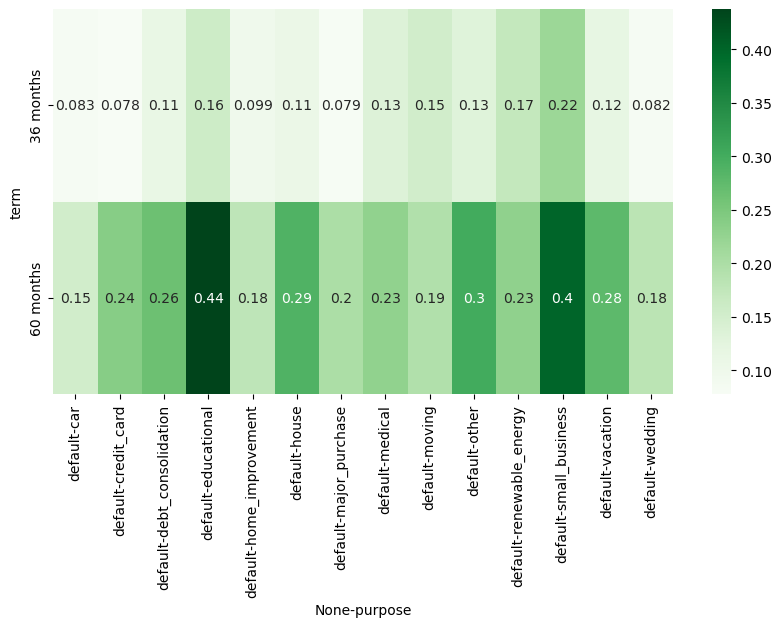

In [550]:
cat=pd.pivot_table(data=loan, values=["default"], columns=["purpose"], index=["term"], aggfunc=np.mean)
plt.figure(figsize=(10,5))
sns.heatmap(cat,cmap="Greens", annot=True)

#loans of 60 months of tenure tend to default more, special attention should be given to small business and educational purposes


<Axes: xlabel='None-pub_rec', ylabel='inq_last_6mths'>

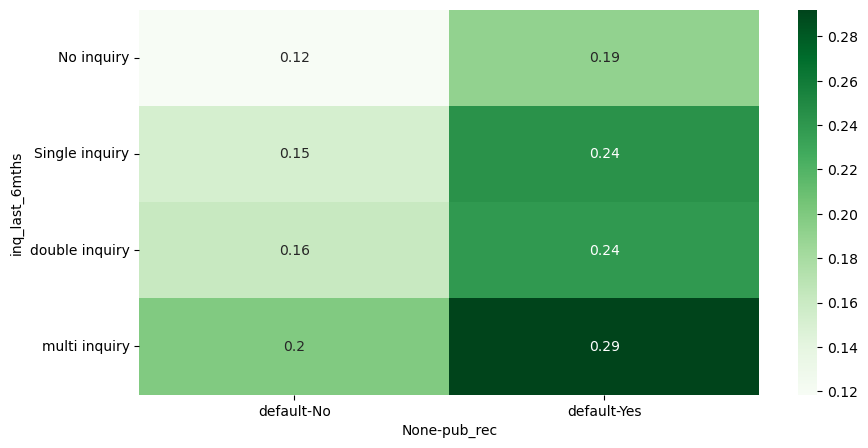

In [526]:
cat=pd.pivot_table(data=loan, values=["default"], index=["inq_last_6mths"], columns=["pub_rec",], aggfunc=np.mean)
plt.figure(figsize=(10,5))
sns.heatmap(cat,cmap="Greens", annot=True)
#applicants with derogatory public records tend to default more

<Axes: xlabel='None-income_bucket', ylabel='dti_bucket'>

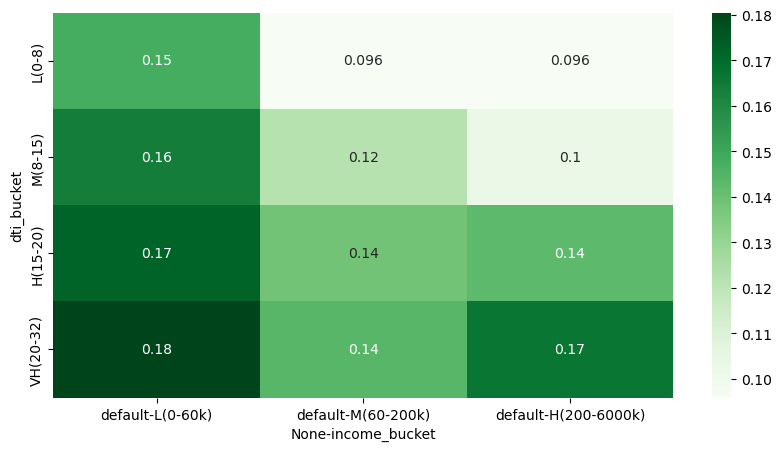

In [527]:
cat=pd.pivot_table(data=loan, values=["default"], index=["dti_bucket"], columns=["income_bucket",], aggfunc=np.mean)
plt.figure(figsize=(10,5))
sns.heatmap(cat,cmap="Greens", annot=True)
#not a strong relation beteeen low income and high dti ratio 
